In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xgboost import XGBRegressor as xgr

In [2]:
dataset_names = os.listdir()[1:]
dataset_names

['sample_submission.csv', 'test.csv', 'train.csv']

In [77]:
trainset = pd.read_csv(dataset_names[2])
testset = pd.read_csv(dataset_names[1])
trainset.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
print(len(trainset.columns))
len(testset.columns) ## The target (label) column is excluded

76


75

In [5]:
testset.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [7]:
null_value_percent = nvp =  0.7
rejected_cols = trainset.columns[trainset.count()<=len(trainset)*nvp]
print(trainset.count()[rejected_cols])
trainset_f = trainset[trainset.columns[trainset.count()>len(trainset)*nvp]]
len(trainset_f.columns)

UvAerosolLayerHeight_aerosol_height           439
UvAerosolLayerHeight_aerosol_pressure         439
UvAerosolLayerHeight_aerosol_optical_depth    439
UvAerosolLayerHeight_sensor_zenith_angle      439
UvAerosolLayerHeight_sensor_azimuth_angle     439
UvAerosolLayerHeight_solar_azimuth_angle      439
UvAerosolLayerHeight_solar_zenith_angle       439
dtype: int64


69

In [8]:
labels = trainset_f.pop('emission')

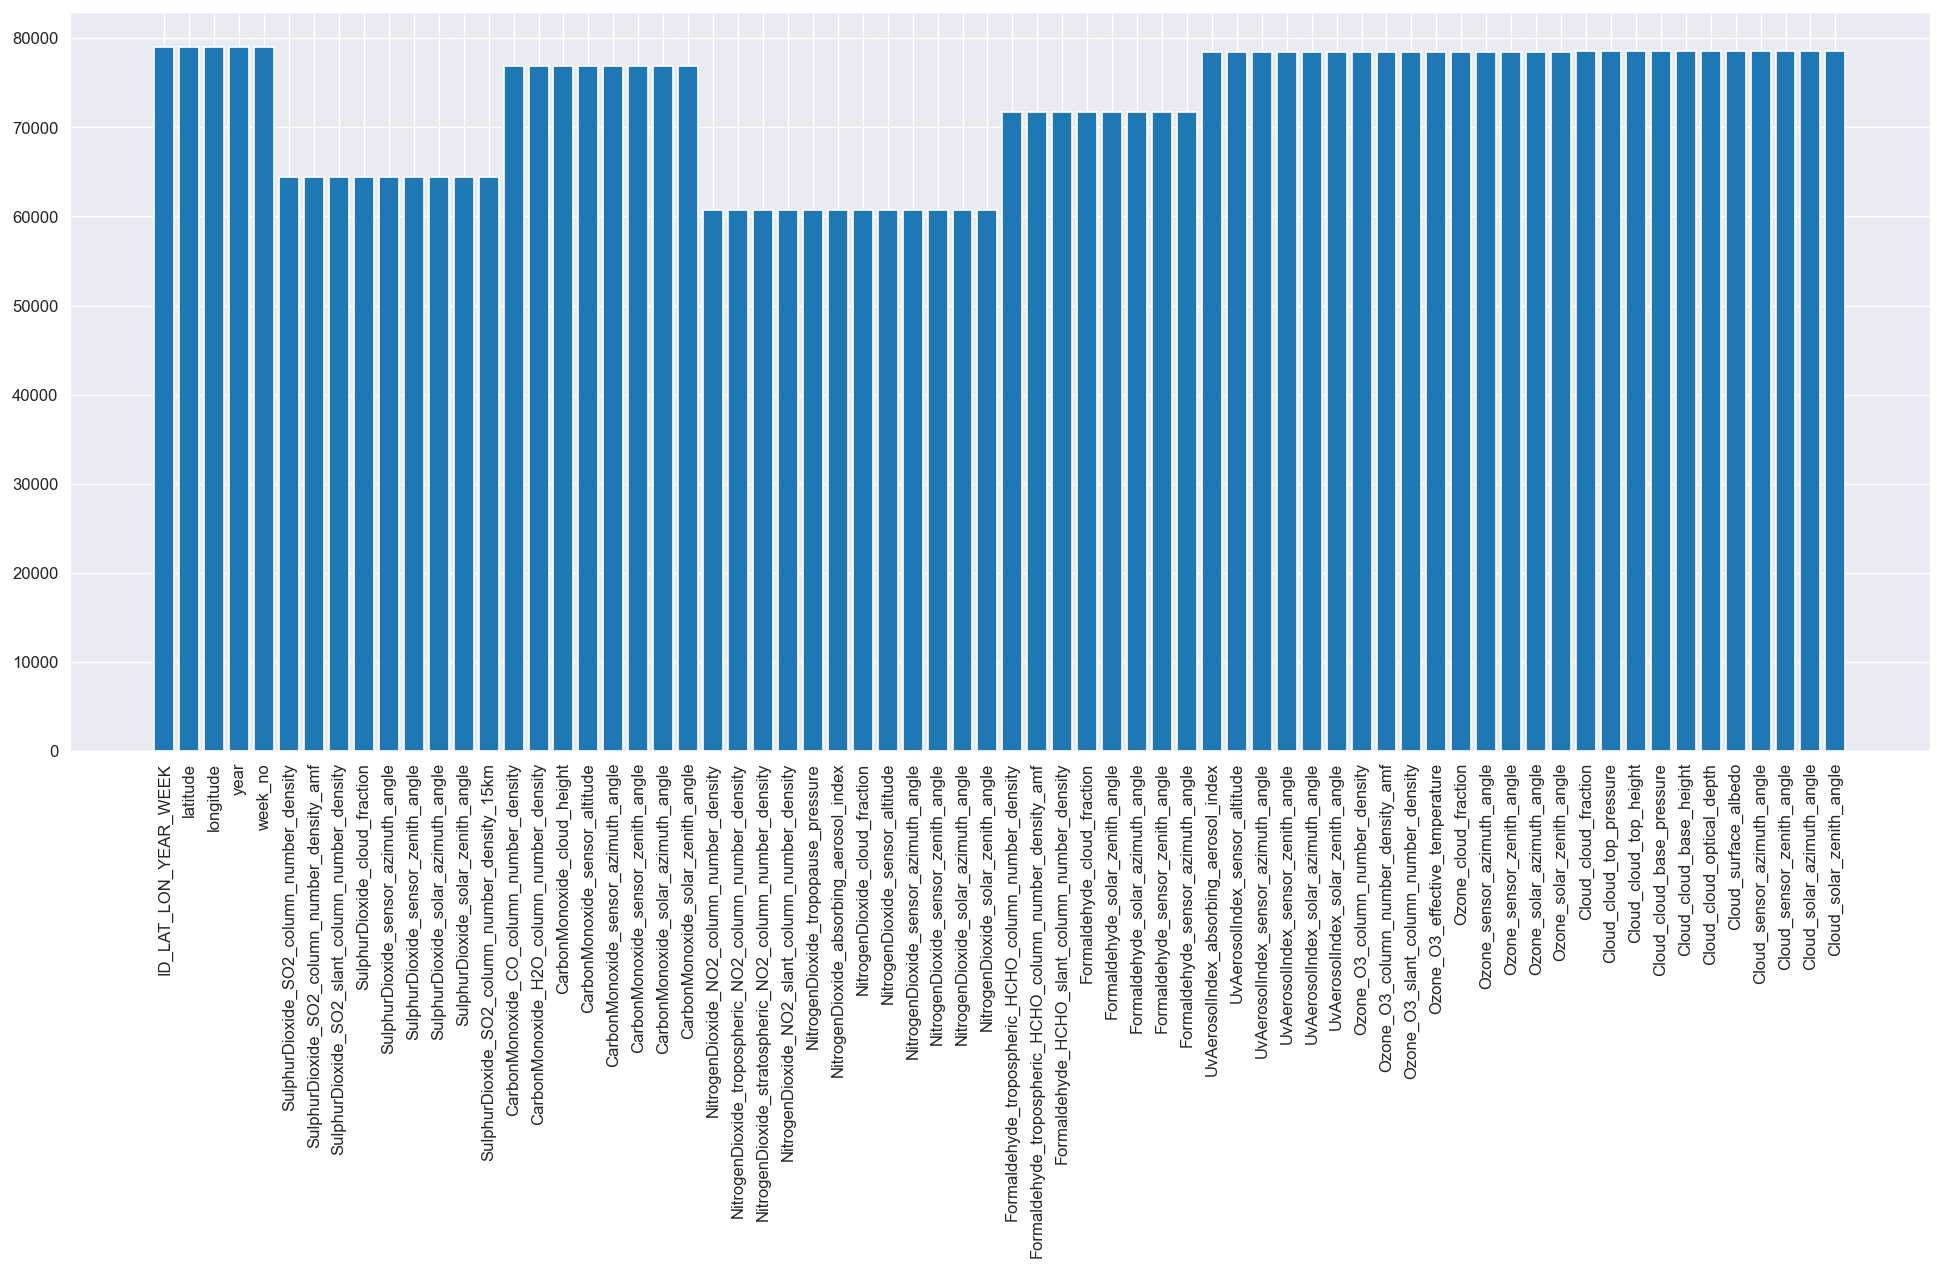

In [9]:
plt.figure(figsize=(20,8), dpi=120)
plt.bar(trainset_f.count().index, trainset_f.count())
plt.xticks(rotation=90)
plt.show()

In [9]:
trainset_num = trainset_f.drop("ID_LAT_LON_YEAR_WEEK", axis=1)

<AxesSubplot:>

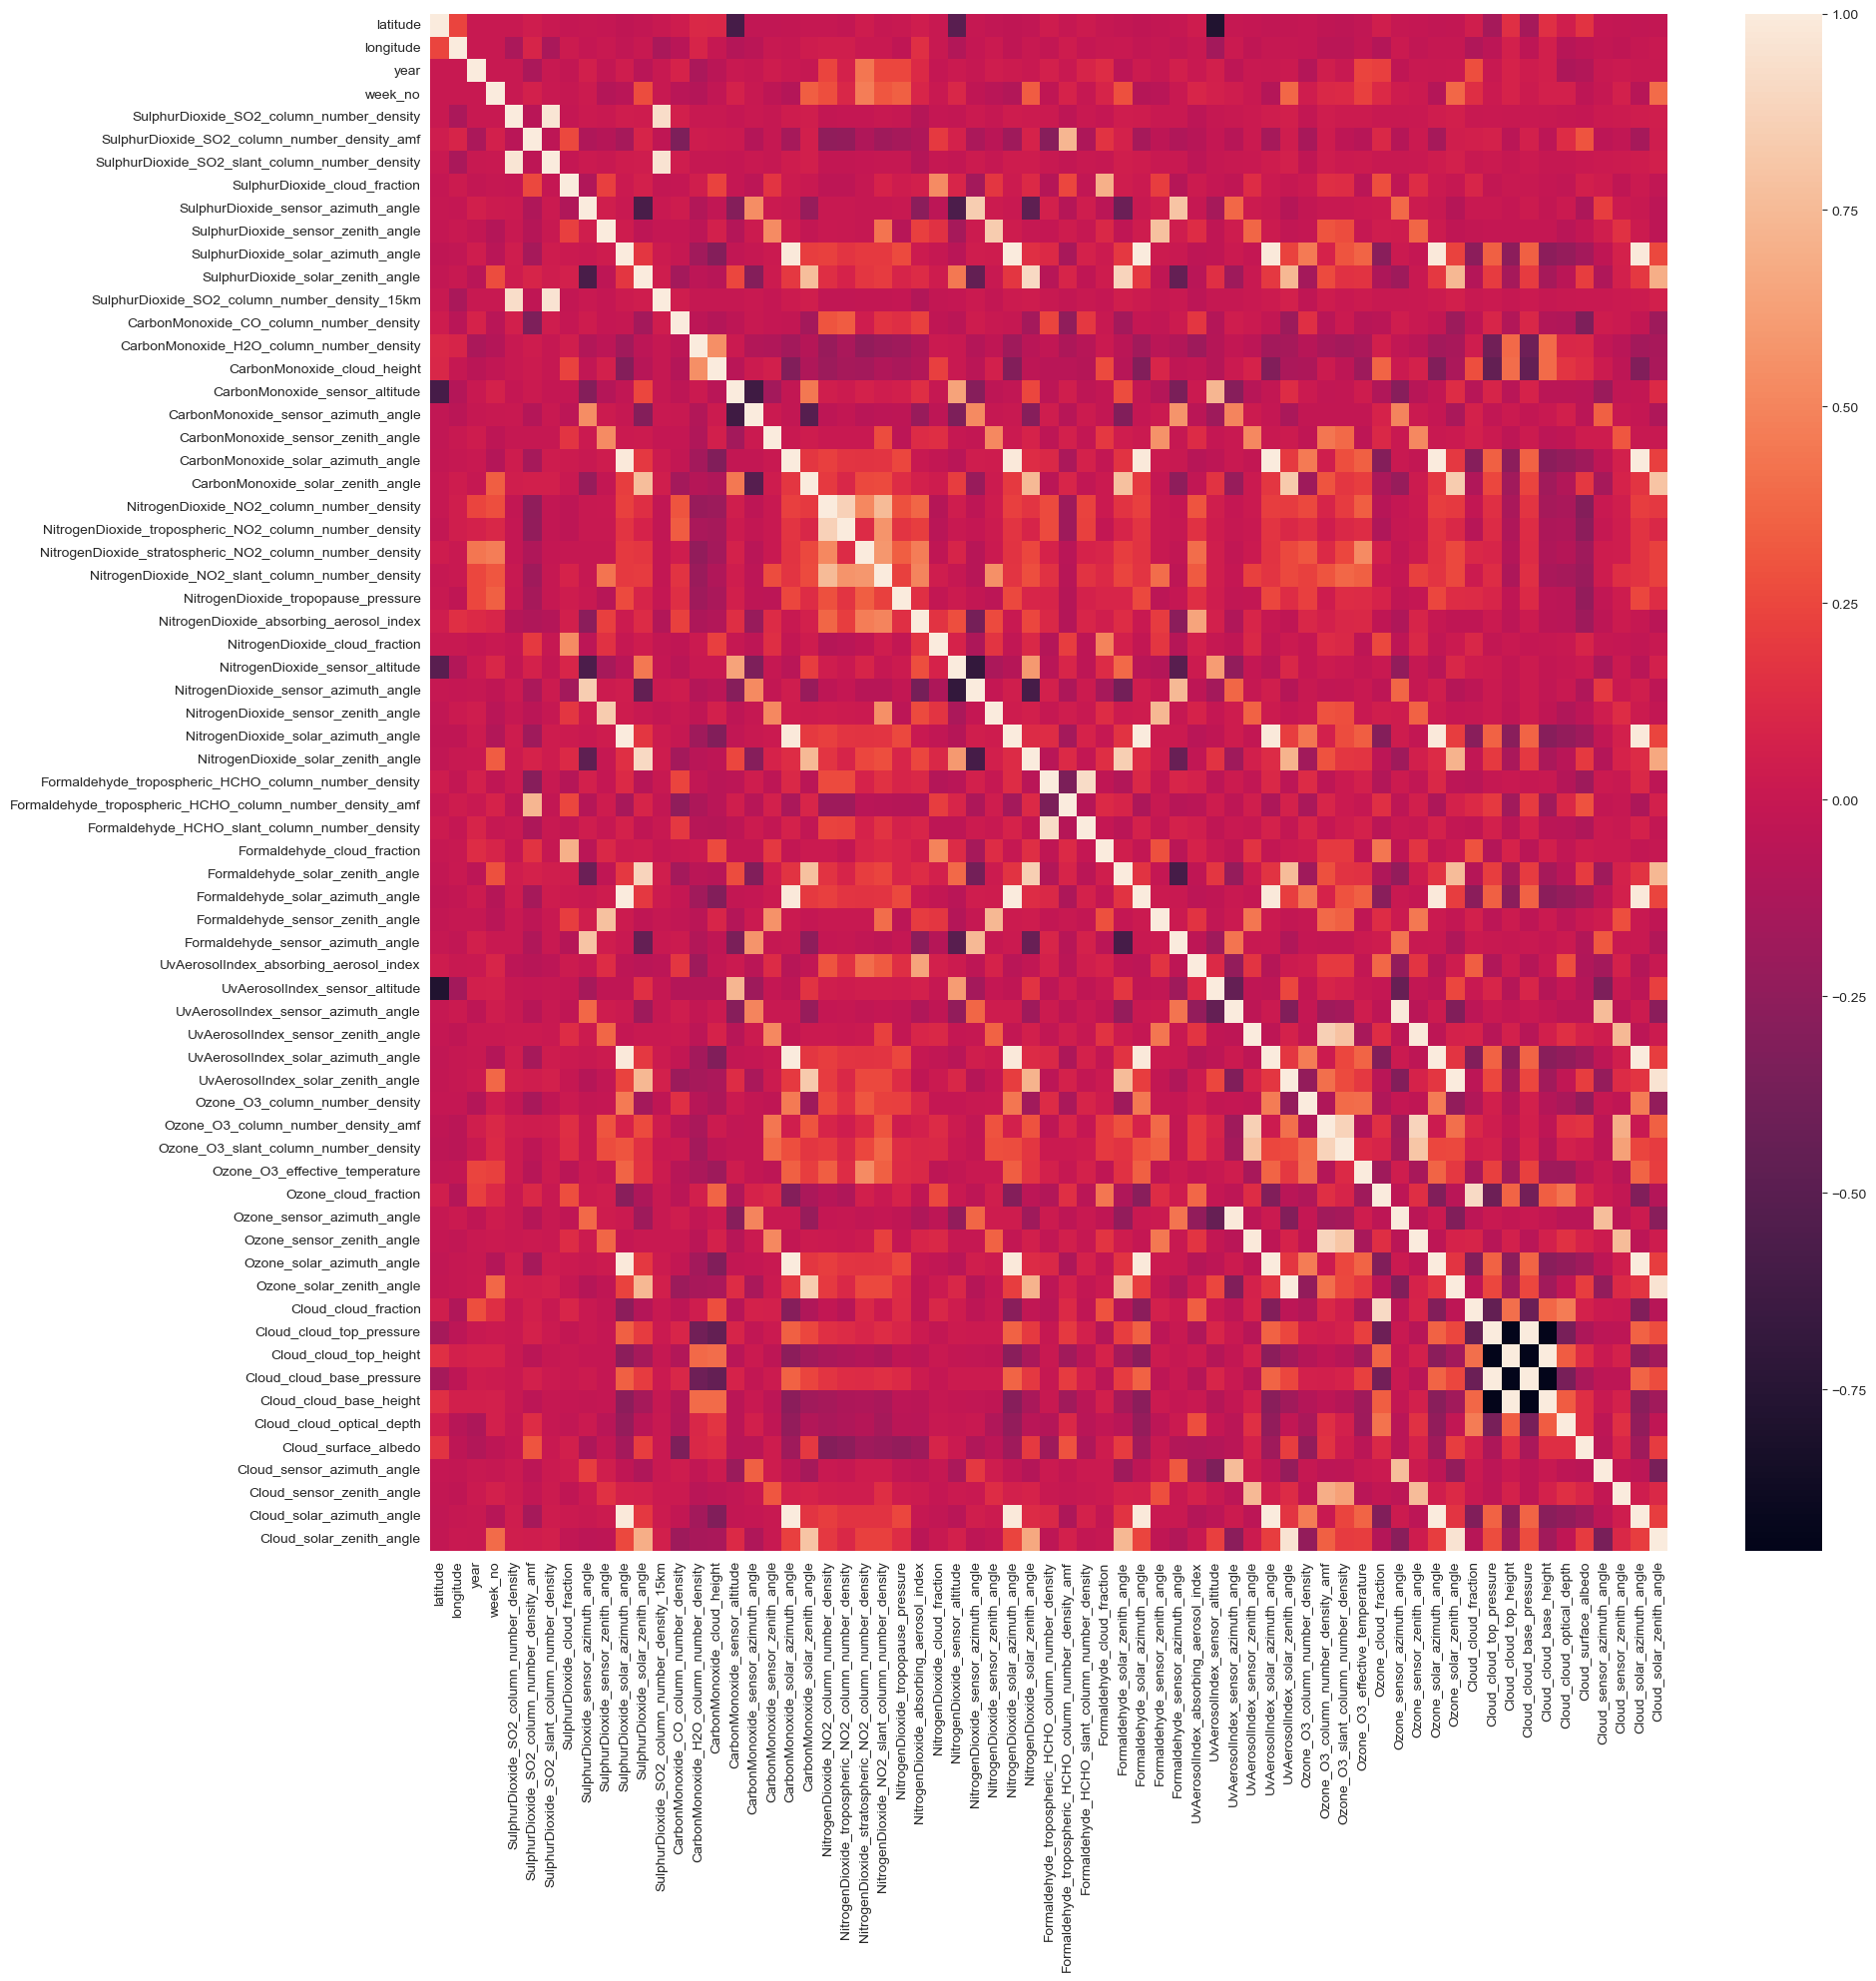

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(trainset_num.corr())

In [12]:
trainset_num.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [10]:
# create correlation  matrix
corr_matrix = trainset_num.corr().abs()

# select upper traingle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# drop the columns
trainset_t = trainset_num.drop(to_drop, axis=1)

In [11]:
trainset_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 52 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_cloud_fraction                             64414 non-null  float64
 7   SulphurDioxide_sensor_azimuth_angle                       64414 non-null  float64
 8   SulphurDioxide_s

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
trainset_imp = pd.DataFrame(imp.fit_transform(trainset_t),columns=trainset_t.columns)

In [13]:
trainset_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 52 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  float64
 3   week_no                                                   79023 non-null  float64
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_cloud_fraction                             79023 non-null  float64
 7   SulphurDioxide_sensor_azimuth_angle                       79023 non-null  float64
 8   SulphurDioxide_s

In [25]:
# Perform Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainset_imp_scaled = pd.DataFrame(scaler.fit_transform(trainset_imp), columns=trainset_imp.columns)


In [26]:
print(type(trainset_imp_scaled), type(trainset_imp))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(trainset_imp_scaled, labels, train_size=0.7)

In [28]:
def get_predict(model):
    print("Training score:",round(model.score(X_train, y_train),5)*100)
    print("Validation score:",round(model.score(X_valid, y_valid),5)*100)

### Models

Starting simplest from Decision Tree with maximum depth = 16 after paramter tuning to minimize the model variance between training and validation dataset

In [17]:
from sklearn.tree import DecisionTreeRegressor as dtr
model = dtr(max_depth=16)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16)

In [18]:
get_predict(model)

Training score: 97.949
Validation score: 95.06099999999999


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor as rfr
rf_model = rfr(n_estimators=200, max_depth=16, n_jobs=8)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=200, n_jobs=8)

In [20]:
get_predict(rf_model)

Training score: 98.027
Validation score: 96.313


In [23]:
type(X_train)

numpy.ndarray

In [29]:
features = []
for i, j in zip(trainset_imp.columns, rf_model.feature_importances_):
    if j>0.001:
        features.append(i)
print(features)
X_train = X_train[features]
X_valid = X_valid[features]

['latitude', 'longitude', 'week_no', 'SulphurDioxide_solar_azimuth_angle', 'NitrogenDioxide_NO2_column_number_density', 'Ozone_O3_column_number_density', 'Cloud_surface_albedo']


### Gradient Boosted Trees

#### Basic

In [36]:
from sklearn.ensemble import GradientBoostingRegressor as gbr
gb_model = gbr(n_estimators=100, max_depth=32, subsample=0.7)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=32, subsample=0.7)

In [37]:
get_predict(gb_model)

Training score: 99.997
Validation score: 98.207


#### Histogram based

In [40]:
from sklearn.ensemble import HistGradientBoostingRegressor as hgbr
hgb_model = hgbr(max_iter=1000, max_depth=32)
hgb_model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=32, max_iter=1000)

In [41]:
get_predict(hgb_model)

Training score: 98.128
Validation score: 97.26599999999999


In [44]:
## Performs better with unrestricted maximum depth of the trees

from sklearn.ensemble import HistGradientBoostingRegressor as hgbr
hgb_model = hgbr(max_iter=1000)
hgb_model.fit(X_train, y_train)
get_predict(hgb_model)

Training score: 98.576
Validation score: 97.509


#### XGboosted

In [72]:
xgrm = xgr(eta=0.2, max_depth=12, subsample=0.8)
xgrm.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [94]:
from sklearn.metrics import r2_score
y_pred = xgrm.predict(X_train)
print("Training Score: ",r2_score(y_train, y_pred)*100)
y_pred = xgrm.predict(X_valid)
print("Validation Score: ",r2_score(y_valid, y_pred)*100)

Training Score:  99.93640972985087
Validation Score:  98.4888054977458


### K-Fold Cross Validation

In [ ]:
trainset_scaled = trainset_imp_scaled[features]
trainset_scaled.head()

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_model, X_train, y_train, cv=3)
scores.mean(), scores.std()

(0.9717087096328417, 0.007705468979856729)

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(hgb_model, X_train, y_train, cv=3)
scores.mean(), scores.std()

(0.9709969099213515, 0.004436838158175497)

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgrm, X_train, y_train, cv=3)
scores.mean(), scores.std()

(0.9781724163418598, 0.0037616873503360723)

In [78]:
testid = testset.pop("ID_LAT_LON_YEAR_WEEK")

In [85]:
testset = pd.DataFrame(scaler.transform(pd.DataFrame(imp.transform(testset[trainset_imp.columns]), columns=trainset_imp.columns)),columns=trainset_imp.columns)[features]

In [91]:
pd.DataFrame({"ID_LAT_LON_YEAR_WEEK":testid, "emission":xgrm.predict(testset)}).to_csv("Submission V1.csv",index=False)